In [1]:
pip install numpy pandas scikit-fuzzy matplotlib requests

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

# --- Baca Dataset ---
data = pd.read_csv("employee productivity and satisfaction.csv")

# --- Pilih kolom relevan ---
df = data[['Satisfaction Rate (%)', 'Feedback Score', 'Productivity (%)']].copy()

# --- Ubah nama kolom agar lebih mudah dipakai ---
df.columns = ['satisfaction', 'feedback', 'productivity']

# --- Tampilkan 5 baris pertama ---
df.head()


,satisfaction,feedback,productivity
0,25,4.7,57
1,76,2.8,55
2,10,2.4,87
3,4,1.4,53
4,9,4.5,3


In [3]:
import pandas as pd

data = pd.read_csv("employee productivity and satisfaction.csv")

print(f"Dataset dimuat dengan {len(data)} baris dan {len(data.columns)} kolom.\n")
print("Kolom yang tersedia:")
print(list(data.columns))

percentage = 0.3
subset = data.iloc[:int(len(data) * percentage)]

print(f"\nMenampilkan {len(subset)} baris pertama ({percentage*100:.0f}% dari total data):")
subset.head()


Dataset dimuat dengan 99 baris dan 11 kolom.

Kolom yang tersedia:
['Name', 'Age', 'Gender', 'Projects Completed', 'Productivity (%)', 'Satisfaction Rate (%)', 'Feedback Score', 'Department', 'Position', 'Joining Date', 'Salary']

Menampilkan 29 baris pertama (30% dari total data):


,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [4]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

# --- Baca dataset ---
data = pd.read_csv("employee productivity and satisfaction.csv")

# --- Hitung range nilai dari dataset ---
min_satisfaction = data['Satisfaction Rate (%)'].min()
max_satisfaction = data['Satisfaction Rate (%)'].max()

min_feedback = data['Feedback Score'].min()
max_feedback = data['Feedback Score'].max()

min_productivity = data['Productivity (%)'].min()
max_productivity = data['Productivity (%)'].max()

# --- Cetak informasi range ---
print(f"Satisfaction Rate Range: {min_satisfaction} - {max_satisfaction}")
print(f"Feedback Score Range: {min_feedback} - {max_feedback}")
print(f"Productivity Range: {min_productivity} - {max_productivity}")

# --- Definisikan variabel fuzzy (universe) ---
satisfaction = ctrl.Antecedent(np.arange(min_satisfaction, max_satisfaction + 1, 1), 'satisfaction')
feedback = ctrl.Antecedent(np.arange(min_feedback, max_feedback + 0.1, 0.1), 'feedback')
productivity = ctrl.Consequent(np.arange(min_productivity, max_productivity + 1, 1), 'productivity')


Satisfaction Rate Range: 0 - 100
Feedback Score Range: 1.1 - 4.9
Productivity Range: 0 - 96


C:\Users\LENOVO LOQ\AppData\Roaming\Python\Python312\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


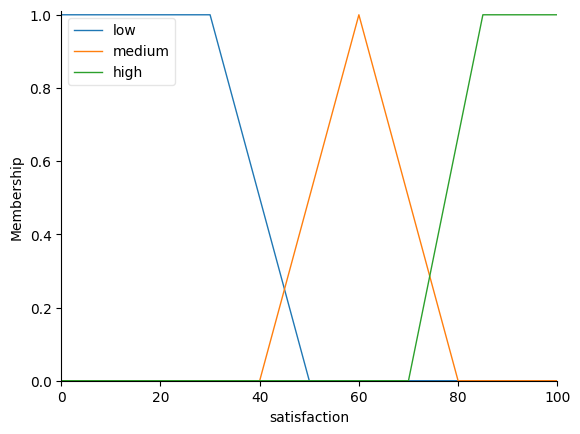

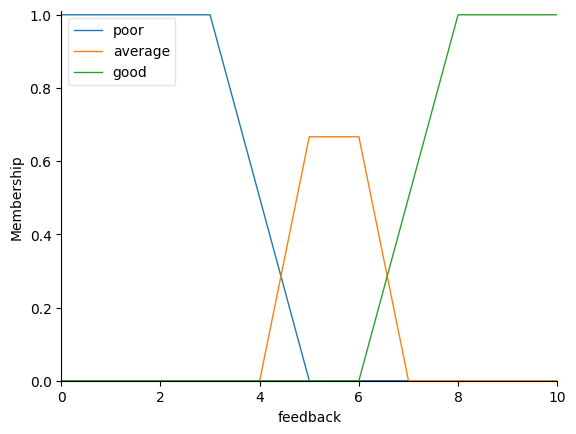

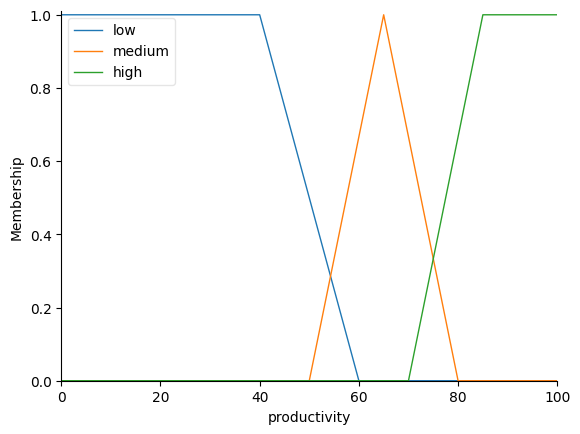

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# --- Definisi variabel fuzzy ---
satisfaction = ctrl.Antecedent(np.arange(0, 101, 1), 'satisfaction')  # 0–100%
feedback = ctrl.Antecedent(np.arange(0, 11, 1), 'feedback')            # 0–10
productivity = ctrl.Consequent(np.arange(0, 101, 1), 'productivity')   # 0–100%

# --- Membership Functions untuk Satisfaction Rate (%) ---
satisfaction['low'] = fuzz.trapmf(satisfaction.universe, [0, 0, 30, 50])
satisfaction['medium'] = fuzz.trimf(satisfaction.universe, [40, 60, 80])
satisfaction['high'] = fuzz.trapmf(satisfaction.universe, [70, 85, 100, 100])

# --- Membership Functions untuk Feedback Score (0–10) ---
feedback['poor'] = fuzz.trapmf(feedback.universe, [0, 0, 3, 5])
feedback['average'] = fuzz.trimf(feedback.universe, [4, 5.5, 7])
feedback['good'] = fuzz.trapmf(feedback.universe, [6, 8, 10, 10])

# --- Membership Functions untuk Productivity (%) ---
productivity['low'] = fuzz.trapmf(productivity.universe, [0, 0, 40, 60])
productivity['medium'] = fuzz.trimf(productivity.universe, [50, 65, 80])
productivity['high'] = fuzz.trapmf(productivity.universe, [70, 85, 100, 100])

# --- Visualisasi Membership Function ---
satisfaction.view()
plt.show()

feedback.view()
plt.show()

productivity.view()
plt.show()


In [6]:
# --- Membership Functions ---

# Satisfaction Rate
satisfaction['low'] = fuzz.trapmf(satisfaction.universe, [0, 0, 40, 60])
satisfaction['medium'] = fuzz.trimf(satisfaction.universe, [50, 65, 80])
satisfaction['high'] = fuzz.trapmf(satisfaction.universe, [70, 85, 100, 100])

# Feedback Score
feedback['poor'] = fuzz.trapmf(feedback.universe, [0, 0, 2, 4])
feedback['average'] = fuzz.trimf(feedback.universe, [3, 5, 7])
feedback['excellent'] = fuzz.trapmf(feedback.universe, [6, 8, 10, 10])

# Productivity
productivity['low'] = fuzz.trapmf(productivity.universe, [0, 0, 40, 60])
productivity['medium'] = fuzz.trimf(productivity.universe, [50, 65, 80])
productivity['high'] = fuzz.trapmf(productivity.universe, [70, 85, 100, 100])


# --- Fuzzy Rules ---
rule1 = ctrl.Rule(satisfaction['high'] & feedback['excellent'], productivity['high'])
rule2 = ctrl.Rule(satisfaction['medium'] & feedback['average'], productivity['medium'])
rule3 = ctrl.Rule(satisfaction['low'] & feedback['poor'], productivity['low'])
rule4 = ctrl.Rule(satisfaction['high'] & feedback['average'], productivity['high'])
rule5 = ctrl.Rule(satisfaction['medium'] & feedback['excellent'], productivity['high'])
rule6 = ctrl.Rule(satisfaction['low'] & feedback['excellent'], productivity['medium'])
rule7 = ctrl.Rule(satisfaction['medium'] & feedback['poor'], productivity['low'])
rule8 = ctrl.Rule(satisfaction['high'], productivity['high'])
rule9 = ctrl.Rule(satisfaction['low'], productivity['low'])


# --- Buat sistem kontrol ---
productivity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
productivity_sim = ctrl.ControlSystemSimulation(productivity_ctrl)


In [7]:
# --- Sistem kontrol untuk produktivitas karyawan ---
productivity_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9
])

# Simulasi sistem fuzzy
productivity_sim = ctrl.ControlSystemSimulation(productivity_ctrl)


In [8]:
# --- Fungsi untuk menghitung produktivitas berdasarkan fuzzy logic ---
def compute_productivity(row):
    # Buat simulasi baru untuk setiap baris data
    productivity_simulation = ctrl.ControlSystemSimulation(productivity_ctrl)

    # Inisialisasi nilai input
    satisfaction_value = None
    feedback_value = None

    try:
        # Ambil nilai dari dataset
        satisfaction_value = row['Satisfaction Rate (%)']
        feedback_value = row['Feedback Score']

        # Pastikan nilai input tetap dalam rentang (universe)
        satisfaction_value = np.clip(satisfaction_value, satisfaction.universe[0], satisfaction.universe[-1])
        feedback_value = np.clip(feedback_value, feedback.universe[0], feedback.universe[-1])

        # Masukkan input ke sistem fuzzy
        productivity_simulation.input['satisfaction'] = satisfaction_value
        productivity_simulation.input['feedback'] = feedback_value

        # Jalankan proses fuzzy (defuzzifikasi)
        productivity_simulation.compute()

        # Keluarkan hasil (nilai produktivitas prediksi)
        return productivity_simulation.output['productivity']

    except Exception as ex:
        print(f"Error pada baris {row.name}: {ex}")
        print(f"Inputs: satisfaction={satisfaction_value}, feedback={feedback_value}")
        return np.nan

# --- Terapkan ke seluruh dataset ---
data['Predicted Productivity'] = data.apply(compute_productivity, axis=1)

# --- Tampilkan hasil sebagian ---
data[['Name', 'Satisfaction Rate (%)', 'Feedback Score', 'Predicted Productivity']].head()


,Name,Satisfaction Rate (%),Feedback Score,Predicted Productivity
0,Douglas Lindsey,25,4.7,25.333333
1,Anthony Roberson,76,2.8,52.597009
2,Thomas Miller,10,2.4,25.333333
3,Joshua Lewis,4,1.4,25.333333
4,Stephanie Bailey,9,4.5,25.333333


In [9]:
data.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,Predicted Productivity
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596,25.333333
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540,52.597009
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292,25.333333
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303,25.333333
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133,25.333333


In [10]:
def classify_productivity(score):
    if score >= 80:
        return "High"
    elif score >= 60:
        return "Medium"
    else:
        return "Low"

# Terapkan ke hasil fuzzy
data['Productivity Category'] = data['Predicted Productivity'].apply(classify_productivity)

# Tampilkan beberapa baris hasilnya
data[['Name', 'Satisfaction Rate (%)', 'Feedback Score', 'Predicted Productivity', 'Productivity Category']].head()


,Name,Satisfaction Rate (%),Feedback Score,Predicted Productivity,Productivity Category
0,Douglas Lindsey,25,4.7,25.333333,Low
1,Anthony Roberson,76,2.8,52.597009,Low
2,Thomas Miller,10,2.4,25.333333,Low
3,Joshua Lewis,4,1.4,25.333333,Low
4,Stephanie Bailey,9,4.5,25.333333,Low


In [13]:
# --- Tampilkan 10 karyawan dengan produktivitas prediksi tertinggi ---
top_employees = data.sort_values(by='Predicted Productivity', ascending=False).head(10)

# --- Simpan hasilnya ke file CSV baru ---
top_employees.to_csv("./top_employees.csv", index=False)

# --- Tampilkan beberapa kolom penting ---
top_employees[['Name', 'Satisfaction Rate (%)', 'Feedback Score',
               'Predicted Productivity', 'Productivity Category']]


,Name,Satisfaction Rate (%),Feedback Score,Predicted Productivity,Productivity Category
32,Emily Palmer,100,1.5,88.333333,High
30,Michelle Perez,94,4.9,88.333333,High
12,Donald Davis,97,1.8,88.333333,High
31,Kim Larson,99,2.8,88.333333,High
81,Kathryn Scott,87,4.3,88.333333,High
84,Mark Wilson,94,3.7,88.333333,High
95,Patricia Campos,89,2.6,88.333333,High
55,Harold Nguyen,95,2.2,88.333333,High
97,Renee Jones,93,3.0,88.333333,High
83,Calvin Mullen,87,3.1,88.333333,High


In [16]:
def satisfaction_insight(row):
    if row['Satisfaction Rate (%)'] > 80 and row['Productivity (%)'] > 7:
        return "Highly Engaged"
    elif row['Satisfaction Rate (%)'] < 50 and row['Productivity (%)'] < 5:
        return "At Risk"
    else:
        return "Moderate Performer"

data['Employee Insight'] = data.apply(satisfaction_insight, axis=1)

# hasil
data[['Name', 'Satisfaction Rate (%)', 'Productivity (%)', 'Employee Insight']].head()


,Name,Satisfaction Rate (%),Productivity (%),Employee Insight
0,Douglas Lindsey,25,57,Moderate Performer
1,Anthony Roberson,76,55,Moderate Performer
2,Thomas Miller,10,87,Moderate Performer
3,Joshua Lewis,4,53,Moderate Performer
4,Stephanie Bailey,9,3,At Risk


In [18]:
# Perbandingan Kinerja (Real vs Predicted)

def performance_comparison(row):
    real = row['Productivity (%)']                 # Nilai aktual dari dataset
    predicted = row['Predicted Productivity']      # Hasil fuzzy logic kamu

    diff = real - predicted

    if diff > 10:
        return "Overperforming (Above Expectation)"
    elif diff < -10:
        return "Underperforming (Below Expectation)"
    else:
        return "Aligned with Expectation"

# kolom baru
data['Insight Perbandingan Kinerja (Real vs Predicted)'] = data.apply(performance_comparison, axis=1)

# hasil
data[['Name', 'Productivity (%)', 'Predicted Productivity', 
      'Insight Perbandingan Kinerja (Real vs Predicted)']].head(10)


,Name,Productivity (%),Predicted Productivity,Insight Perbandingan Kinerja (Real vs Predicted)
0,Douglas Lindsey,57,25.333333,Overperforming (Above Expectation)
1,Anthony Roberson,55,52.597009,Aligned with Expectation
2,Thomas Miller,87,25.333333,Overperforming (Above Expectation)
3,Joshua Lewis,53,25.333333,Overperforming (Above Expectation)
4,Stephanie Bailey,3,25.333333,Underperforming (Below Expectation)
5,Jonathan King,63,25.333333,Overperforming (Above Expectation)
6,Kyle Figueroa,41,25.333333,Overperforming (Above Expectation)
7,Shannon Allen,92,27.111111,Overperforming (Above Expectation)
8,Daryl Noble,32,25.983819,Aligned with Expectation
9,Tracy Figueroa,10,25.333333,Underperforming (Below Expectation)


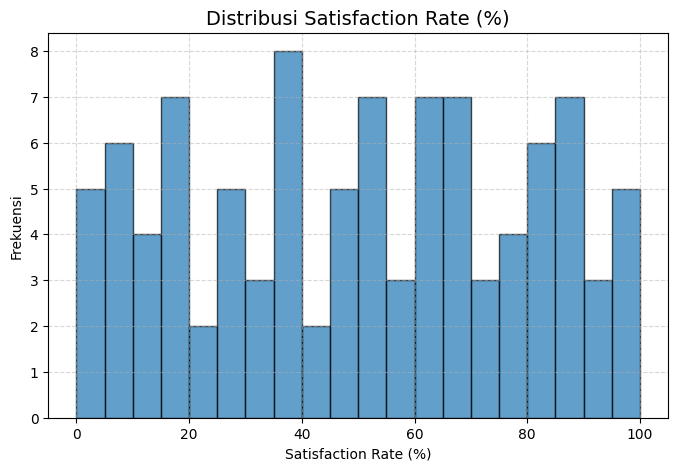

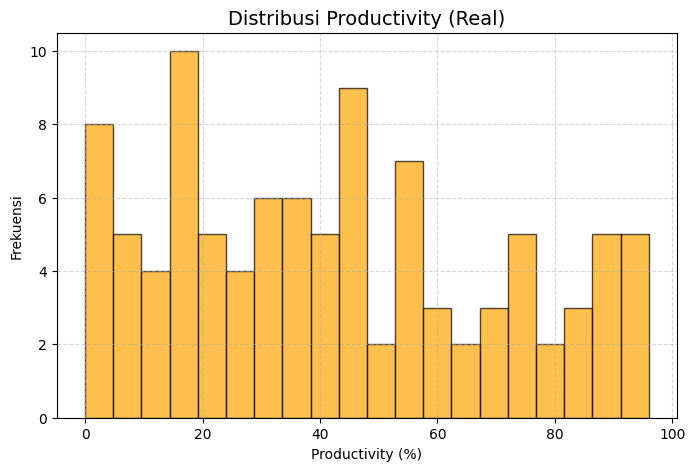

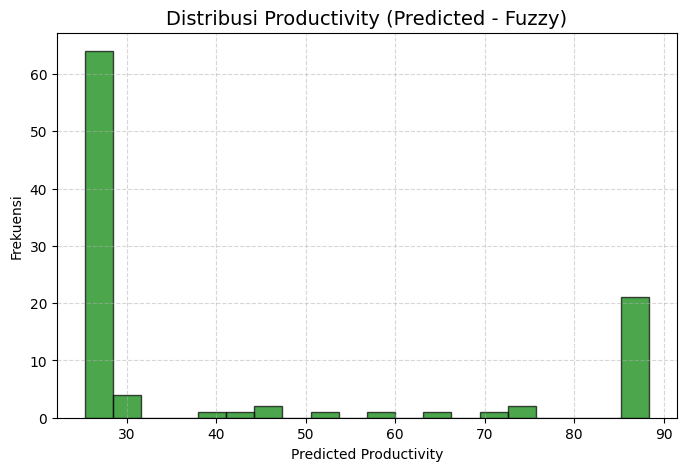

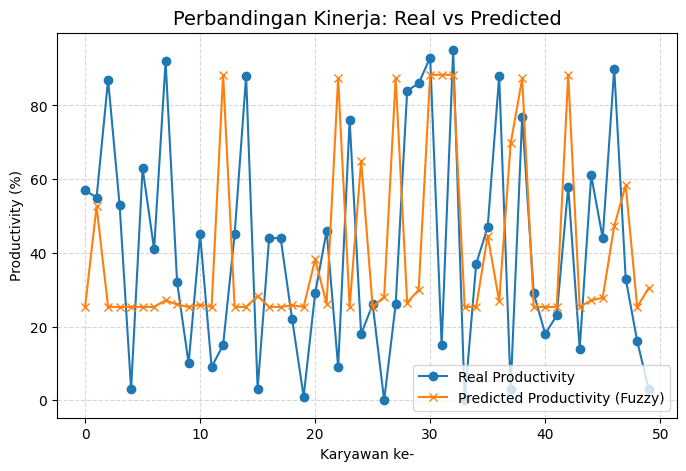

In [20]:
import matplotlib.pyplot as plt

# === 1. Distribusi Satisfaction Rate ===
plt.figure(figsize=(8, 5))
plt.hist(data['Satisfaction Rate (%)'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribusi Satisfaction Rate (%)", fontsize=14)
plt.xlabel("Satisfaction Rate (%)")
plt.ylabel("Frekuensi")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# === 2. Distribusi Productivity (Real) ===
plt.figure(figsize=(8, 5))
plt.hist(data['Productivity (%)'], bins=20, edgecolor='black', color='orange', alpha=0.7)
plt.title("Distribusi Productivity (Real)", fontsize=14)
plt.xlabel("Productivity (%)")
plt.ylabel("Frekuensi")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# === 3. Distribusi Productivity (Predicted dari Fuzzy) ===
plt.figure(figsize=(8, 5))
plt.hist(data['Predicted Productivity'], bins=20, edgecolor='black', color='green', alpha=0.7)
plt.title("Distribusi Productivity (Predicted - Fuzzy)", fontsize=14)
plt.xlabel("Predicted Productivity")
plt.ylabel("Frekuensi")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# === 4. Perbandingan Real vs Predicted ===
plt.figure(figsize=(8, 5))
plt.plot(data['Productivity (%)'].values[:50], label="Real Productivity", marker='o')
plt.plot(data['Predicted Productivity'].values[:50], label="Predicted Productivity (Fuzzy)", marker='x')
plt.title("Perbandingan Kinerja: Real vs Predicted", fontsize=14)
plt.xlabel("Karyawan ke-")
plt.ylabel("Productivity (%)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
